(sec:gradient)=
# Gradient Methods 

Recall that our aim is to solve/tackle the following unconstrained optimization problem:
```{math}
\min_{\vw \in \RR^d} \quad f(\vw)
```
where $\vw$ is the optimization variable; $f: \RR^d \to \RR$ is the objective function which is assumed to be lower bounded. There are no explicit constraints on $\vw$. 

To make our life easier, we assume that $f$ is (continuously) differentiable everywhere. As discussed in the last subsection, the task of tackling the optimization problem can be cast as searching for $\vw^*$ such that 
```{math}
\nabla f(\vw^*) = 0.
```

The **gradient (a.k.a. first-order) method** is an efficient numerical scheme for achieving the above goals. In its simplest form, the gradient method can be described as: 

````{prf:algorithm} Gradient Method
:label: alg:gradient

- **Input**: initial point $\vw^0$, stepsize sequence $\{ \gamma_k \}_{k \geq 0}$, max. no. of iterations $K$.

- For $k=0,1,2,..., K-1$,
```{math}
\vw^{k+1} = \vw^k - \gamma_k \nabla f( \vw^k).
```
- **Output**: last iterate $\vw^K$, or the solution sequence $\{ \vw^k \}_{k=1}^K$.
````

````{admonition} Insight (Gradient Method)

The update recursion of gradient method is inspired by the 2nd order Taylor expansion of $f$. Consider the current iterate at $\vw$ and our goal is to search for a new iterate $\vw' = \vw + \gamma \Delta$ such that $f(\vw')$ is minimized, where $\Delta$ is the search direction. We observe 
```{math}
f( \vw' ) = f( \vw ) + \gamma (\nabla f( \vw ))^\top \Delta + {\cal O}( \gamma^2 )
```

For small step size with $\gamma \approx 0$, the search direction $\Delta$ which minimizes $f(\vw')$ is to pick 
```{math}
\Delta = - \nabla f(\vw)
```
This hence inspires the gradient method recursion $\vw' = \vw - \gamma \nabla f(\vw)$.

````

The gradient method (and more importantly, its stochastic version) has become the backbone for modern large scale optimization software packages that includes LLM optimization. Part of the reason is that there exists efficient functions (e.g., ``autograd`` in Pytorch) for calculating the gradient of complicated objective functions which greatly simplify the implementation of the algorithm. 

In the remainder of this chapter, we will analyze the convergence of gradient methods to give ourselves a taste of how well they will perform under different settings in theory, followed by a simple numerical example. 

## Convergence for Smooth Objective Function

````{prf:assumption} Smooth Objective Function
:label: assm:smooth

There exists $L \geq 0$ such that for any $\vw, \vw' \in \mathbb{R}^d$, we have 
```{math}
\| \nabla f( \vw ) - \nabla f( \vw' ) \| \leq L \| \vw - \vw' \|.
```

````

````{prf:theorem} Convergence of Gradient Method (Smooth Case)
:label: thm:gd-smooth 

Under {prf:ref}`assm:smooth` and suppose that the step size satisfies $\gamma_k \leq 1/L$. For any $K \geq 1$, the following holds:

```{math}
\min_{ k=0, ..., K-1 } \| \nabla f( \vw^k ) \|^2 \leq \frac{ 2 \left( f (\vw^0) - f(\vw^K) \right) }{ \sum_{k=0}^{K-1} \gamma_k }
```

````

````{admonition} Proof (Gradient Method for Smooth Objective Function)
:class: dropdown

We begin by observing that under {prf:ref}`assm:smooth`, it holds for any $k \geq 0$ that, 
```{math}
f( \vw^{k+1} ) \leq f( \vw^k ) + \langle \nabla f( \vw^k ) , \vw^{k+1} - \vw^k \rangle + \frac{L}{2} \| \vw^{k+1} - \vw^k \|^2
```

By noting that $\vw^{k+1} - \vw^k = - \gamma_k \nabla f(\vw^k)$ and $\gamma_k \leq 1/L$, we have
```{math}
f( \vw^{k+1} ) \leq f( \vw^k ) - \gamma_k \left( 1 - \gamma_k \frac{L}{2} \right) \| \nabla f( \vw^k ) \|^2 \leq f( \vw^k ) - \frac{\gamma_k}{2} \| \nabla f( \vw^k ) \|^2
```

This implies 
```{math}
\frac{\gamma_k}{2} \| \nabla f( \vw^k ) \|^2 \leq f( \vw^k ) - f( \vw^{k+1} )
```
Summing both sides from $k=0$ to $k=K-1$ yields the desired result. 

````

Particularly, we notice that by picking $\gamma_k = 1/L$ for all $k$, we have 
```{math}
\min_{ k=0, ..., K-1 } \| \nabla f( \vw^k ) \|^2 \leq \frac{ 2L ( f(\vw^0) - \min_{\vw} f(\vw) )}{ K } = {\cal O} \left( \frac{1}{K} \right)
```
In other words, in less than or equal to $K$ iterations, the gradient method finds an ${\cal O}(1/K)$ stationary solution.

## Convergence for Convex and Smooth Objective Function

````{prf:assumption} Convex Objective Function
:label: assm:convex

The objective function $f(\vw)$ is convex and is lower bounded. 
````

````{prf:theorem} Convergence of Gradient Method (Convex and Smooth Case)
:label: thm:gd-convex 

Under {prf:ref}`assm:smooth`, {prf:ref}`assm:convex`, and suppose that the selected step size is constant satisfying $\gamma_k = \gamma \leq 1/L$ for any $k$. Then, for any $K \geq 1$, the following holds:

```{math}
f( \vw^K ) - f(\vw^\star) \leq \frac{\| \vw^0 - \vw^\star \|^2 }{2 \gamma K}
```

````

````{admonition} Proof (Gradient Method for Convex & Smooth Objective Function)
:class: dropdown

We begin the proof by continuing from the proof of {prf:ref}`thm:gd-smooth` and observe that 
```{math}
f( \vw^{k+1} ) \leq f( \vw^k ) - \frac{\gamma}{2} \| \nabla f( \vw^k ) \|^2
```

Furthermore, from the convexity of $f$, we notice that 
```{math}
f( \vw^\star ) \geq f( \vw^k ) + \langle \nabla f( \vw^k ), \vw^\star - \vw^k \rangle 
```
Thus 
```{math}
f( \vw^{k+1} ) \leq f( \vw^\star ) +  \langle \nabla f( \vw^k ),  \vw^k - \vw^\star \rangle - \frac{\gamma}{2} \| \nabla f( \vw^k ) \|^2
```
We observe that 
```{math}
\begin{align}
& \langle \nabla f( \vw^k ),  \vw^k - \vw^\star \rangle - \frac{\gamma}{2} \| \nabla f( \vw^k ) \|^2 \\
& = \frac{1}{2 \gamma } \left( \| \vw^k - \vw^\star \|^2 - \| \vw^k - \vw^\star \|^2 + 2 \gamma \langle \nabla f( \vw^k ),  \vw^k - \vw^\star \rangle - \frac{1}{\gamma^2} \| \nabla f( \vw^k ) \|^2 \right) \\
& = \frac{1}{2 \gamma } \left( \| \vw^k - \vw^\star \|^2 - \| \vw^{k+1} - \vw^\star \|^2 \right)
\end{align}
```

This implies 
```{math}
f( \vw^{k+1} ) - f(\vw^\star) \leq \frac{1}{2 \gamma} \left( \| \vw^k - \vw^\star \|^2 - \| \vw^{k+1} - \vw^\star \|^2 \right)
```
Now, we notice that 
```{math}
\begin{align}
\sum_{k=1}^{K} f( \vw^k ) - f(\vw^\star) & \leq \sum_{k=0}^{K-1} \frac{1}{2 \gamma} \left( \| \vw^k - \vw^\star \|^2 - \| \vw^{k+1} - \vw^\star \|^2 \right) \leq \frac{1}{2\gamma} \| \vw^0 - \vw^\star \|^2
\end{align}
```

Since $f( \vw^{K} ) \leq f( \vw^{K-1} ) \leq \cdots \leq f(\vw^1 )$, the above implies that 
```{math}
f( \vw^K ) - f(\vw^\star) \leq \frac{\| \vw^0 - \vw^\star \|^2 }{2 \gamma K}
```
This concludes the proof.

````

In particular, setting $\gamma = 1/L$ yields 
```{math}
f( \vw^K ) - f(\vw^\star) \leq \frac{ 2L \| \vw^0 - \vw^\star \|^2 }{ K } = {\cal O} \left( \frac{1}{K} \right)
```

## Convergence for Strongly Convex and Smooth Objective Function


````{prf:assumption} Strongly Convex Objective Function
:label: assm:strconvex

The objective function $f(\vw)$ is $\mu$-strongly convex, with $\mu > 0$. In particular, for any $\vw', \vw \in \mathbb{R}^d$, it holds
```{math}
f( \vw' ) \geq f( \vw ) + \langle \nabla f(\vw) , \vw' - \vw \rangle + \frac{\mu}{2} \| \vw' - \vw \|^2.
``` 
````

Notice that an immediate consequence of the above assumption is that the optimal solution $\vw^\star$ to the optimization problem is now unique.

````{prf:theorem} Convergence of Gradient Method (Strongly Convex and Smooth Case)
:label: thm:gd-strconvex 

Under {prf:ref}`assm:smooth`, {prf:ref}`assm:strconvex`, and suppose that the selected step size is constant satisfying $\gamma_k = \gamma \leq 1/L$ for any $k$. Then, for any $k \geq 1$, the following holds:

```{math}
\| \vw^{k+1} - \vw^\star \|^2 \leq ( 1 - \mu \gamma ) \| \vw^k - \vw^\star \|^2.
```

````

````{admonition} Proof (Gradient Method for Strongly Convex & Smooth Objective Function)
:class: dropdown

We begin the proof by observing that 
```{math}
\begin{align} 
\| \vw^{k+1} - \vw^\star \|^2 & = \| \vw^k - \gamma \nabla f( \vw^k ) - \vw^\star \|^2 \\
& = \| \vw^k - \vw^\star \|^2 - 2\gamma \langle \nabla f(\vw^k ), \vw^k - \vw^\star \rangle + \gamma^2 \| \nabla f( \vw^k ) \|^2
\end{align}
```
Notice that by strong convexity, we have 
```{math}
\langle \nabla f(\vw^k ), \vw^\star - \vw^k \rangle \leq f( \vw^\star ) - f( \vw^k ) - \frac{\mu}{2} \| \vw^\star - \vw^k \|^2
```
This yields
```{math}
\begin{align} 
\| \vw^{k+1} - \vw^\star \|^2 & \leq (1 - \gamma \mu ) \| \vw^k - \vw^\star \|^2 + 2\gamma \left( f( \vw^\star) - f( \vw^k ) + \frac{\gamma}{2} \| \nabla f( \vw^k ) \|^2 \right) 
\end{align}
```
Notice that 
```{math}
f( \vw^\star) - f( \vw^k ) \leq f( \vw^{k+1} ) - f(\vw^k ) \leq - \frac{\gamma}{2} \| \nabla f( \vw^k ) \|^2 
```
and thus the last term inside the bracket is upper bounded by $0$. This concludes the proof for the theorem. 

````

Particularly, if we take $\gamma = 1/L$, we have 
```{math}
\| \vw^{k} - \vw^\star \|^2 \leq (1 - \mu/L) \| \vw^{k-1} - \vw^\star \|^2 \leq \cdots \leq (1 - \mu/L)^k \| \vw^0 - \vw^\star \|^2 = {\cal O} ( (1-\mu/L)^k )
```
Thus the gradient method converges **linearly** towards the optimal solution. 

### Remarks and Further Readings

The above theorems present the **finite-time** convergence of the gradient method under various cases. For additional information, readers are referred to Chapter 1 & 2 of {cite}`bertsekas1997nonlinear` for a more comprehensive treatment on unconstrained optimization. For recent developments, readers are referred to {cite}`lan2020first`.




## Numerical Examples

**Example 1**: The following code demonstrates the application of gradient descent method on minimizing $f(x) = x^4 - 4x^2$.

Iteration 1: x = 2.1600, f(x) = 3.1054, gradient = 84.0000
Iteration 6: x = 1.5990, f(x) = -3.6899, gradient = 4.6609
Iteration 11: x = 1.4818, f(x) = -3.9617, gradient = 1.4243
Iteration 16: x = 1.4411, f(x) = -3.9941, gradient = 0.5332
Iteration 21: x = 1.4252, f(x) = -3.9990, gradient = 0.2135
Iteration 26: x = 1.4188, f(x) = -3.9998, gradient = 0.0877
Iteration 31: x = 1.4161, f(x) = -4.0000, gradient = 0.0364
Iteration 36: x = 1.4150, f(x) = -4.0000, gradient = 0.0152
Iteration 41: x = 1.4145, f(x) = -4.0000, gradient = 0.0063
Iteration 46: x = 1.4144, f(x) = -4.0000, gradient = 0.0027


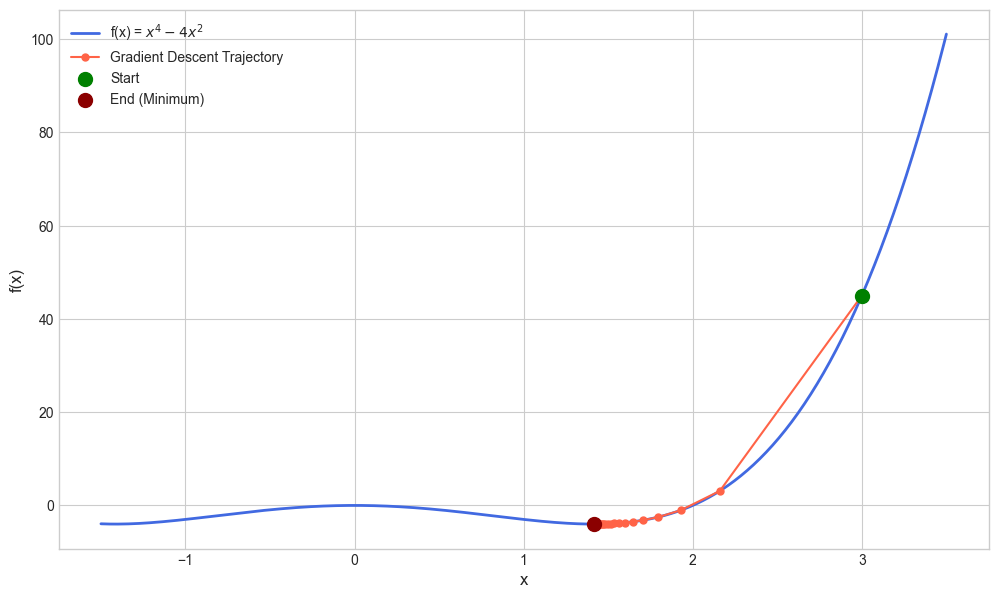

In [23]:
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return x**4 - 4*x**2
def df(x):
    return 4*x**3 - 8*x

start_x = 3; learning_rate = 0.01; n_iterations = 50

trajectory_x = [start_x]; trajectory_y = [f(start_x)]

x = start_x
for i in range(n_iterations):
    gradient = df(x)
    # Gradient descent step!
    x = x - learning_rate * gradient
    
    # Store the new position to plot later
    trajectory_x.append(x); trajectory_y.append(f(x))

    if i % 5 == 0:
        print(f"Iteration {i+1}: x = {x:.4f}, f(x) = {f(x):.4f}, gradient = {gradient:.4f}")

# Plot the function and trajectory
x_range = np.linspace(-1.5, 3.5, 400); y_range = f(x_range)
plt.style.use('seaborn-v0_8-whitegrid'); plt.figure(figsize=(12, 7))
plt.plot(x_range, y_range, label='f(x) = $x^4 - 4x^2$', color='royalblue', linewidth=2)
plt.plot(trajectory_x, trajectory_y, 'o-', color='tomato', label='Gradient Descent Trajectory', markersize=5)

# Start and end points
plt.scatter(trajectory_x[0], trajectory_y[0], color='green', s=100, zorder=5, label='Start')
plt.scatter(trajectory_x[-1], trajectory_y[-1], color='darkred', s=100, zorder=5, label='End (Minimum)')

# Title & labels
plt.xlabel('x', fontsize=12); plt.ylabel('f(x)', fontsize=12)
plt.legend(fontsize=10); plt.grid(True)

# Display the final plot
plt.show()


**Example 2**: The following code demonstrates the application of gradient descent method on minimizing $f(x) = x_1^2 + 4x_2^2 + 2x_1 x_2$.

Iteration 1: x = (2.8000, -0.4000), f(x) = 6.2400, gradient = (12.0000, 24.0000)
Iteration 6: x = (1.2628, -0.3823), f(x) = 1.2138, gradient = (2.0467, -0.6182)
Iteration 11: x = (0.5960, -0.1805), f(x) = 0.2704, gradient = (0.9658, -0.2924)
Iteration 16: x = (0.2813, -0.0852), f(x) = 0.0602, gradient = (0.4558, -0.1380)
Iteration 21: x = (0.1327, -0.0402), f(x) = 0.0134, gradient = (0.2151, -0.0651)


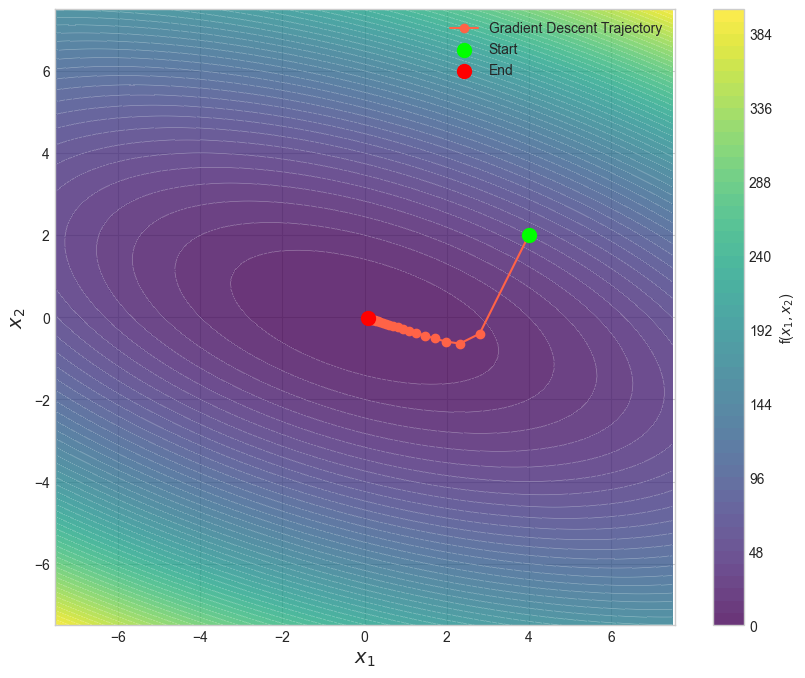

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x1, x2):
    return x1**2 + 4*x2**2 + 2*x1*x2
def grad_f(x):
    return np.array([2*x[0] + 2*x[1], 8*x[1] + 2*x[0]])

start_point = np.array([4.0, 2.0]); learning_rate = 0.1; n_iterations = 25

trajectory = [start_point]; x = start_point

for i in range(n_iterations):
    gradient = grad_f(x)

    # Gradient Descent
    x = x - learning_rate * gradient
    
    # Store the new position to plot later
    trajectory.append(x)

    if i % 5 == 0:
        print(f"Iteration {i+1}: x = ({x[0]:.4f}, {x[1]:.4f}), f(x) = {f(x[0], x[1]):.4f}, gradient = ({gradient[0]:.4f}, {gradient[1]:.4f})")

# Convert trajectory to a numpy array for easier slicing
trajectory = np.array(trajectory)

# --- Plot the Function's Contours and the Trajectory ---
x1_range = np.linspace(-7.5, 7.5, 100)
x2_range = np.linspace(-7.5, 7.5, 100)
X1, X2 = np.meshgrid(x1_range, x2_range); Z = f(X1, X2)
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 8))

plt.contourf(X1, X2, Z, levels=50, cmap='viridis', alpha=0.8)
plt.colorbar(label='f($x_1, x_2$)')
plt.contour(X1, X2, Z, levels=50, colors='white', linewidths=0.5, alpha=0.5)

plt.plot(trajectory[:, 0], trajectory[:, 1], 'o-', color='tomato', label='Gradient Descent Trajectory')
plt.scatter(trajectory[0, 0], trajectory[0, 1], color='lime', s=100, zorder=5, label='Start')
plt.scatter(trajectory[-1, 0], trajectory[-1, 1], color='red', s=100, zorder=5, label='End')
plt.xlabel('$x_1$', fontsize=14); plt.ylabel('$x_2$', fontsize=14)
plt.legend(fontsize=10); plt.axis('equal') 
plt.show()

final_x = trajectory[-1]
final_f_val = f(final_x[0], final_x[1])

## Accelerated Variants of Gradient Methods

Besides the plain gradient methods, there exist several accelerated variants that aim to improve convergence rates. These methods are particularly useful for ill-conditioned problems where the landscape of the objective function varies significantly in different directions.

One of the most well-known accelerated methods is **Nesterov's Accelerated Gradient (NAG)** method {cite}`nesterov2018lectures`, which incorporates momentum into the gradient update. The key idea is to use a combination of the current gradient and the previous update direction to inform the next step. As summarized below:

````{prf:algorithm} Nesterov's Accelerated Gradient (NAG) Method
:label: alg:agd

- **Input**: initial point $\vw^0$, stepsize sequence $\{ \gamma_k \}_{k \geq 0}$, max. no. of iterations $K$, momentum sequence $\{ \beta_k \}_{k \geq 0}$.

- Set $\vw^{-1} = \vw^0$.

- For $k=0,1,2,..., K-1$,
```{math}
{\bf y}^k = \vw^k + \beta_k ( \vw^k - \vw^{k-1} ).
```
```{math}
\vw^{k+1} = {\bf y}^k - \gamma_k \nabla f( {\bf y}^k).
```
- **Output**: last iterate $\vw^K$.
````

An important property of NAG method is its ability to achieve a faster convergence rate than standard GD, particularly for convex functions. For instance, in the case of strongly convex $f(\vw)$ [cf. under the same setting as {prf:ref}`thm:gd-strconvex`], with an appropriate choice of $\gamma, \beta$, it can be shown that 
```{math}
\| \vw^k - \vw^\star \|^2 = {\cal O} \left( \left(1 - \sqrt{\frac{\mu}{L}}
 \right)^k \right)
```
which is faster compared to {prf:ref}`thm:gd-strconvex` which only achieves ${\cal O}( (1-\mu/L)^k )$. For other settings such as with convex and smooth $f(\vw)$, NAG also achieves an improved convergence rate of ${\cal O}(1/k^2)$ compared to the ${\cal O}(1/k)$ rate in {prf:ref}`thm:gd-convex`.

In fact, as proven in {cite}`nesterov2018lectures`, the NAG method achieves the *optimal convergence rate* for both convex and strongly convex functions.

## Exercises